In [15]:
# IMPORTED PACKAGES/LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score, KFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score

# Loading the dataset
data = pd.read_csv('dataset_assignment1.csv')
#Printing the data info
print("DATA INFORMATION")
print(data.info())

# Printing the total number of dataset values
print("\nDATA COUNT")
print(data['class'].value_counts())

DATA INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   feature1  700 non-null    int64
 1   feature2  700 non-null    int64
 2   feature3  700 non-null    int64
 3   feature4  700 non-null    int64
 4   feature5  700 non-null    int64
 5   feature6  700 non-null    int64
 6   feature7  700 non-null    int64
 7   feature8  700 non-null    int64
 8   feature9  700 non-null    int64
 9   class     700 non-null    int64
dtypes: int64(10)
memory usage: 54.8 KB
None

DATA COUNT
0    459
1    241
Name: class, dtype: int64


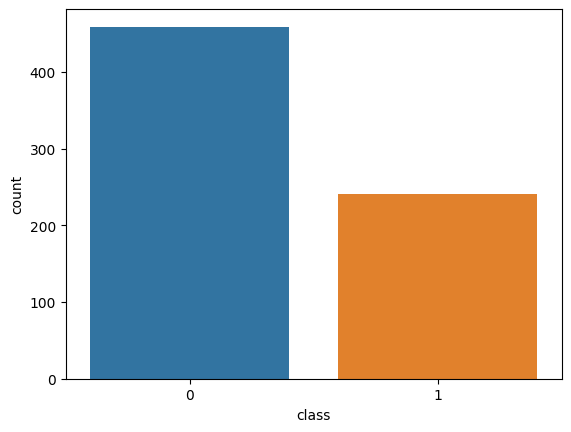

In [16]:
# Visualizing the dataset as histogram (class0 vs class 1)
sns.countplot(x='class', data=data)
plt.show()

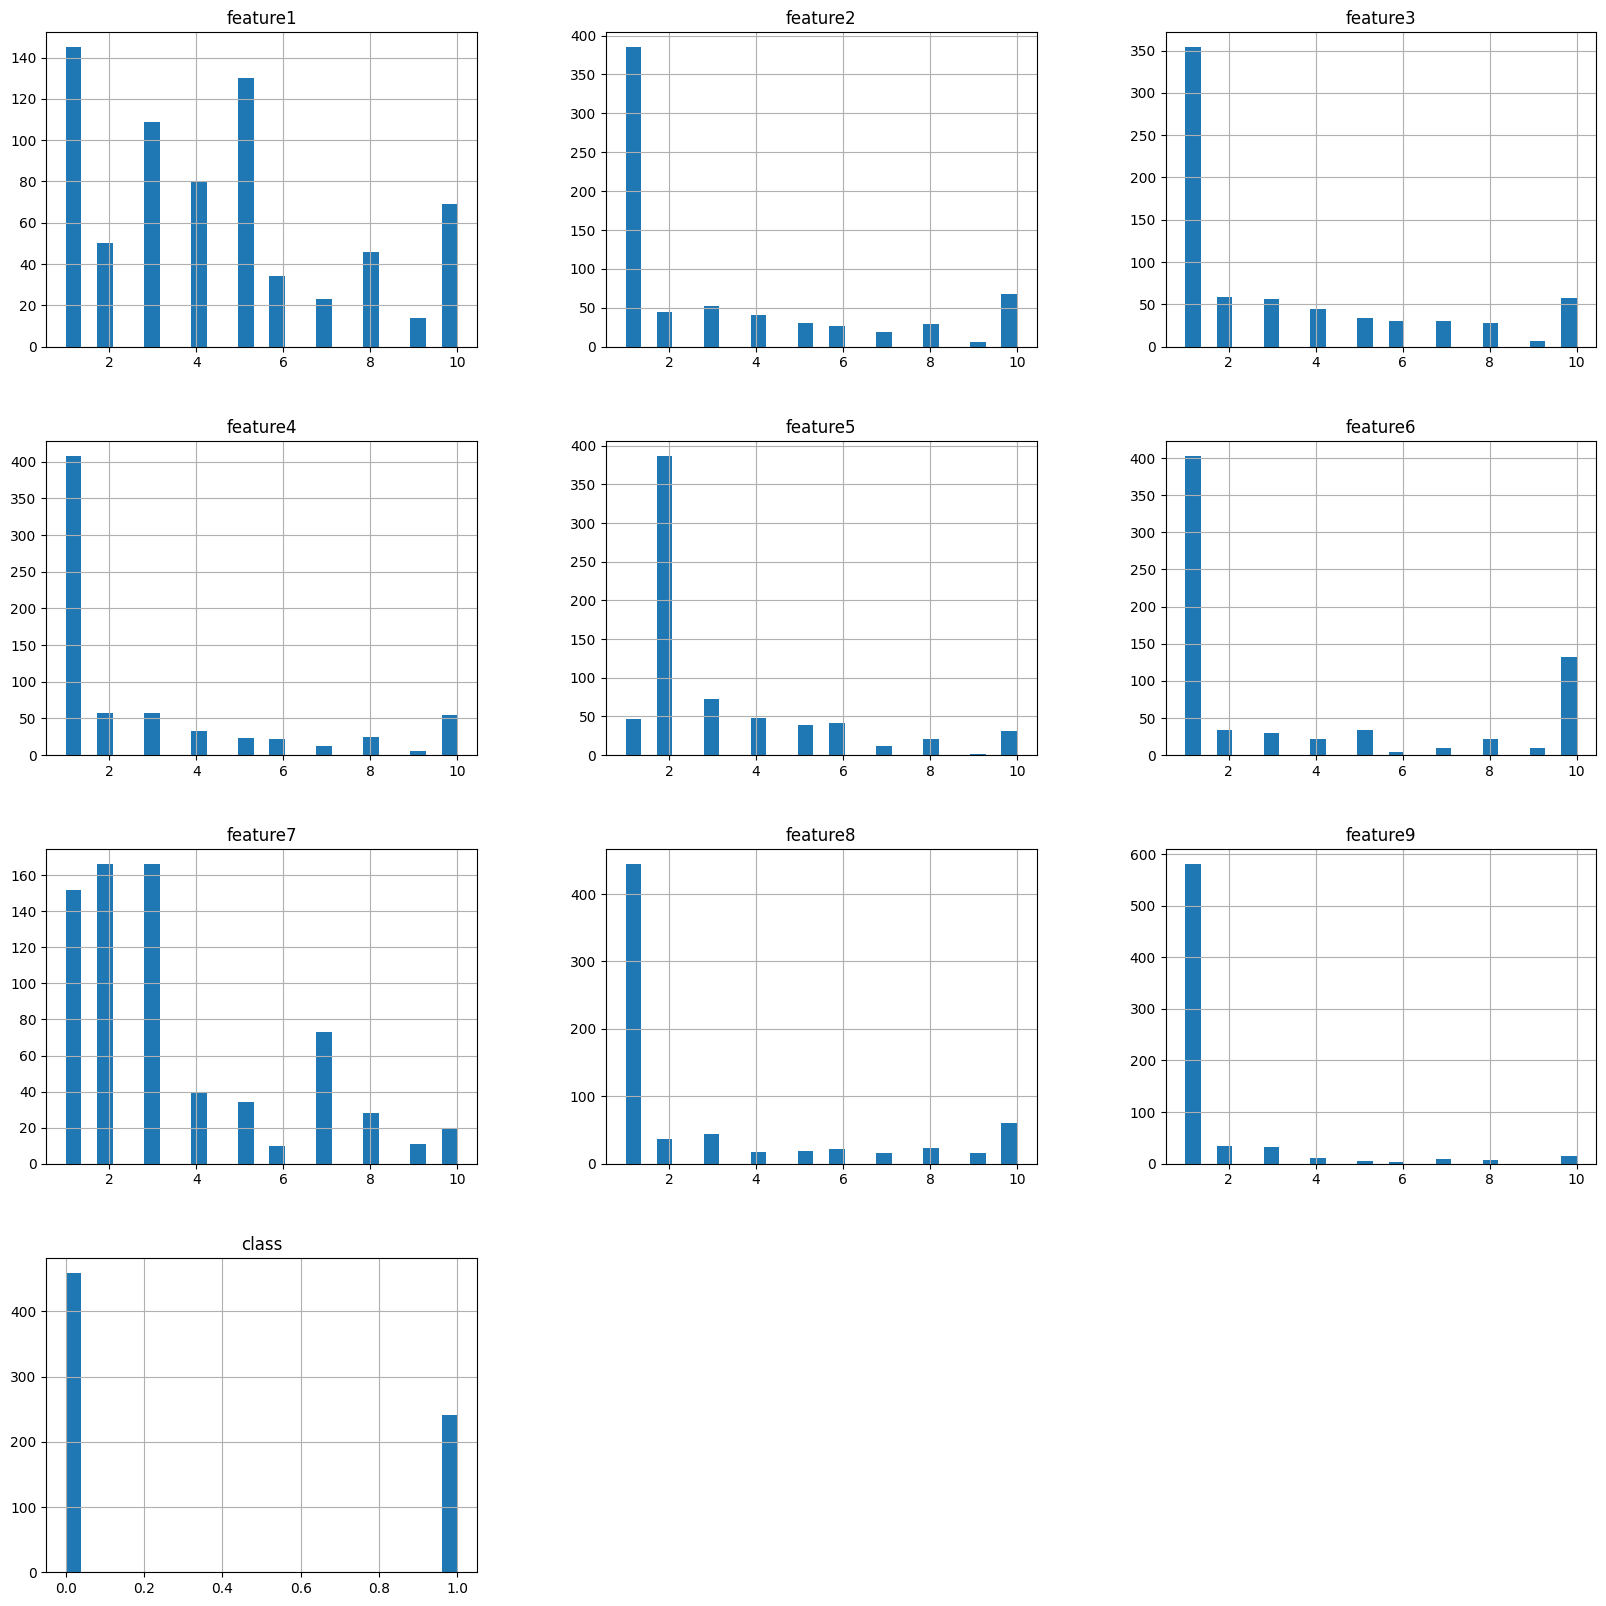

In [17]:
# Visualizing the dataset as histogram (feature-wise classification)
data.hist(bins=25, figsize=(20,20))
plt.title('Feature-wise classification')
plt.show()

<Axes: >

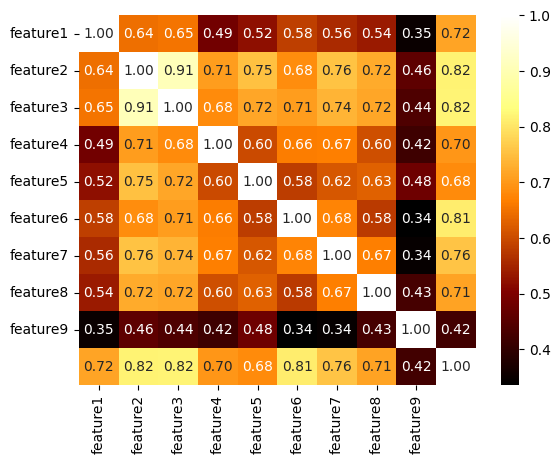

In [18]:
# Visualizing the dataset as correlation matrix
corrMatrix = np.corrcoef(data.iloc[: -1].T)
sns.color_palette("rocket", as_cmap=True)
sns.heatmap(corrMatrix, annot = True, fmt='.2f', xticklabels = data.columns[:-1], cmap='afmhot', yticklabels=data.columns[:-1])

In [19]:
# Printing out the statistical description of features for class 0
print("STATISTICAL FEATURES")
classData0 = data[data['class'] == 0]
print(f"\n Class 0 stats:")
print(classData0.describe())


STATISTICAL FEATURES

 Class 0 stats:
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  459.000000  459.000000  459.000000  459.000000  459.000000  459.000000   
mean     2.956427    1.324619    1.442266    1.363834    2.119826    1.437908   
std      1.672490    0.906830    0.996960    0.995886    0.916145    1.310839   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      1.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
50%      3.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
75%      4.000000    1.000000    1.000000    1.000000    2.000000    1.000000   
max      8.000000    9.000000    8.000000   10.000000   10.000000   10.000000   

         feature7    feature8    feature9  class  
count  459.000000  459.000000  459.000000  459.0  
mean     2.102397    1.289760    1.063181    0.0  
std      1.079976    1.057787    0.501456    0.0  
min      1.000000    1.00000

In [20]:
# Printing out the statistical description of features for class 1
classData1 = data[data['class'] == 1]
print(f"\n Class 1 stats:")
print(classData1.describe())


 Class 1 stats:
         feature1    feature2    feature3    feature4    feature5    feature6  \
count  241.000000  241.000000  241.000000  241.000000  241.000000  241.000000   
mean     7.195021    6.572614    6.560166    5.547718    5.298755    7.593361   
std      2.428849    2.719512    2.562045    3.210465    2.451606    3.129263   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      5.000000    4.000000    4.000000    3.000000    3.000000    5.000000   
50%      8.000000    6.000000    6.000000    5.000000    5.000000   10.000000   
75%     10.000000   10.000000    9.000000    8.000000    6.000000   10.000000   
max     10.000000   10.000000   10.000000   10.000000   10.000000   10.000000   

         feature7    feature8    feature9  class  
count  241.000000  241.000000  241.000000  241.0  
mean     5.979253    5.863071    2.589212    1.0  
std      2.273852    3.350672    2.557939    0.0  
min      1.000000    1.000000    1.000000    1.0 

**DECISION TREE ALGORITHM**


Decision Tree:
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 4}
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        94
           1       0.86      0.96      0.91        46

    accuracy                           0.94       140
   macro avg       0.92      0.94      0.93       140
weighted avg       0.94      0.94      0.94       140

Precision : 93.981368
Recall : 93.571429
Accuracy : 93.571429
F1 Score : 93.649291


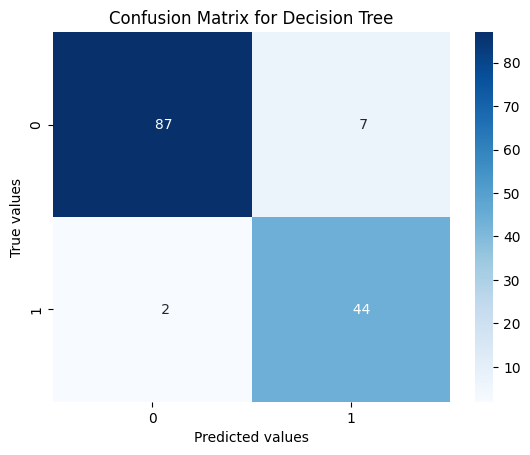

In [21]:
# TRAINING DATA USING DECISION TREE
# Split data into training and testing datasets
X = data.drop('class', axis=1)
y = data['class']
# Splitting the dataset using sklearn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# defining classification methods
decisionTree = DecisionTreeClassifier()

# Define hyperparameters for tuning
param_grid = {'max_depth': [5,10,15,20], 'min_samples_split': range(2,10), 'criterion': ['gini', 'entropy']}

# Train and evaluate models
models = {'Decision Tree': decisionTree}
for name, model in models.items():
    print(f"\n{name}:")
    if name in ['Decision Tree']:
        # Tune hyperparameters using GridSearchCV with 5-Fold Cross Validation
        clf = GridSearchCV(model, param_grid, cv=5)
        #fitting the model
        clf.fit(X_train, y_train)
        print(f"Best Parameters: {clf.best_params_}")
        y_pred = clf.predict(X_test)

        # printing the classification report consisting of values for precision, recall, fi-score and support
        # accuracy can also be obtained from the classification report
        print(classification_report(y_test, y_pred))
        precision = precision_score(y_test, y_pred, average = 'weighted') * 100
        recall = recall_score(y_test, y_pred, average = 'weighted') * 100
        f1Score = f1_score(y_test, y_pred, average = 'weighted') * 100
        accuracy = accuracy_score(y_test, y_pred) * 100

        # printing obtained precision, recall, accuracy and f1 score
        print('Precision : {:3f}'.format(precision))
        print('Recall : {:3f}'.format(recall))
        print('Accuracy : {:3f}'.format(accuracy))
        print('F1 Score : {:3f}'.format(f1Score))

        # Evaluate model performance and print the confusion matrix
        confMatrix = confusion_matrix(y_test, y_pred)
        sns.heatmap(confMatrix, cmap = 'Blues', annot = True, fmt = '7')
        plt.xlabel('Predicted values')
        plt.ylabel('True values')
        plt.title("Confusion Matrix for Decision Tree")
        plt.show()



**RANDOM FOREST ALGORITHM**


Random Forest:
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        94
           1       0.96      0.96      0.96        46

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

Precision : 97.142857
Recall : 97.142857
Accuracy : 97.142857
F1 Score : 97.142857


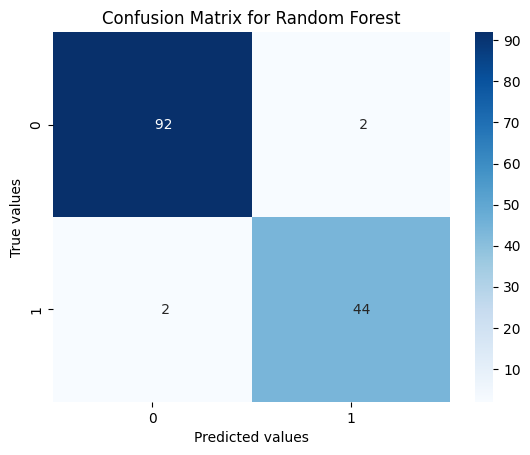

In [22]:
# TRAINING DATA USING RANDOM FOREST ALGORITHM
# Split data into training and testing datasets
X = data.drop('class', axis=1)
y = data['class']
# Splitting the dataset using sklearn train_test_split function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# defining classification methods
randomForest = RandomForestClassifier()

# Define hyperparameters for tuning
param_grid = {'max_depth': [5,10,15,20], 'n_estimators':[100], 'min_samples_split': range(2,10), 'criterion': ['gini', 'entropy']}

# Train and evaluate models
models = {'Random Forest': randomForest}
for name, model in models.items():
    print(f"\n{name}:")
    if name in ['Random Forest']:
        # Tune hyperparameters using GridSearchCV with 5-Fold Cross Validation
        clf = GridSearchCV(model, param_grid, cv=5)
        #fitting the model
        clf.fit(X_train, y_train)
        print(f"Best Parameters: {clf.best_params_}")
        y_pred = clf.predict(X_test)

        # printing the classification report consisting of values for precision, recall, fi-score and support
        # accuracy can also be obtained from the classification report
        print(classification_report(y_test, y_pred))
        precision = precision_score(y_test, y_pred, average = 'weighted') * 100
        recall = recall_score(y_test, y_pred, average = 'weighted') * 100
        f1Score = f1_score(y_test, y_pred, average = 'weighted') * 100
        accuracy = accuracy_score(y_test, y_pred) * 100

        # printing obtained precision, recall, accuracy and f1 score
        print('Precision : {:3f}'.format(precision))
        print('Recall : {:3f}'.format(recall))
        print('Accuracy : {:3f}'.format(accuracy))
        print('F1 Score : {:3f}'.format(f1Score))
        # Evaluate model performance and print the confusion matrix
        confMatrix = confusion_matrix(y_test, y_pred)

        sns.heatmap(confMatrix, cmap = 'Blues', annot = True, fmt = '7')
        plt.xlabel('Predicted values')
        plt.ylabel('True values')
        plt.title("Confusion Matrix for Random Forest")
        plt.show()


**KNN ALGORITHM**

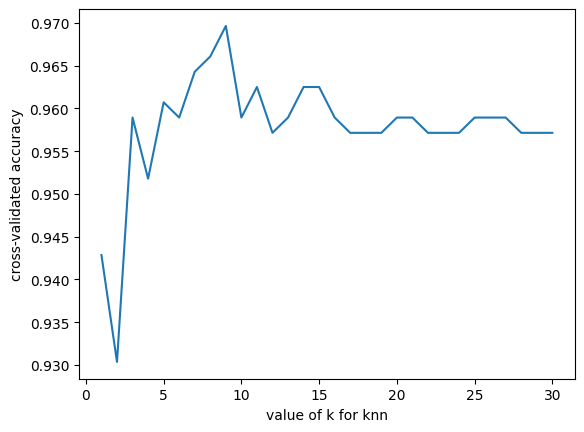

Best k value for accuracy:
[8]


In [23]:
# TRAINING DATA WITH KNN ALGORITHM (BEST ACCURACY)

kRange=range(1,31)
kScores=[]
for k in kRange:
    knn=KNeighborsClassifier(n_neighbors=k)
    #scores for KNN when scoring parameter is accuracy
    scores=cross_val_score(knn,X_train, y_train,cv=5,scoring='accuracy')
    kScores.append(scores.mean())  
# plotting the scores in the range
plt.plot(kRange,kScores)
plt.xlabel('value of k for knn')
plt.ylabel('cross-validated accuracy')
plt.show()
# Best k for accuracy
max_acc = max(kScores)
print("Best k value for accuracy:")
print([i for i, j in enumerate(kScores) if j == max_acc])

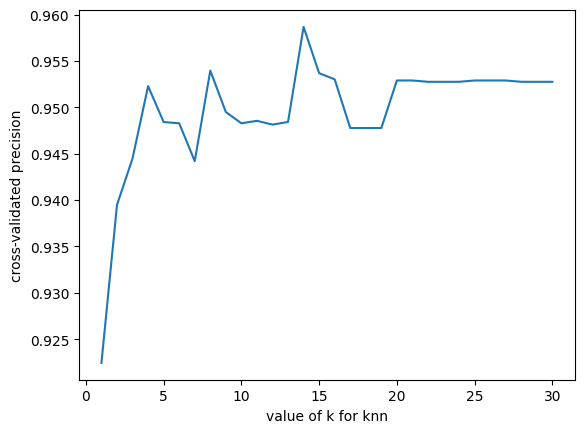

Best k value for precision:
[13]


In [24]:
# TRAINING DATA WITH KNN ALGORITHM (BEST PRECISION)
kRange=range(1,31)
kScores=[]
for k in kRange:
    knn=KNeighborsClassifier(n_neighbors=k)
    #scores for KNN when scoring parameter is precision
    scores=cross_val_score(knn,X_train, y_train,cv=5,scoring='precision')
    kScores.append(scores.mean())  
# plotting the scores in the range
plt.plot(kRange,kScores)
plt.xlabel('value of k for knn')
plt.ylabel('cross-validated precision')
plt.show()
# Best k for precision
max_acc = max(kScores)
print("Best k value for precision:")
print([i for i, j in enumerate(kScores) if j == max_acc]) 

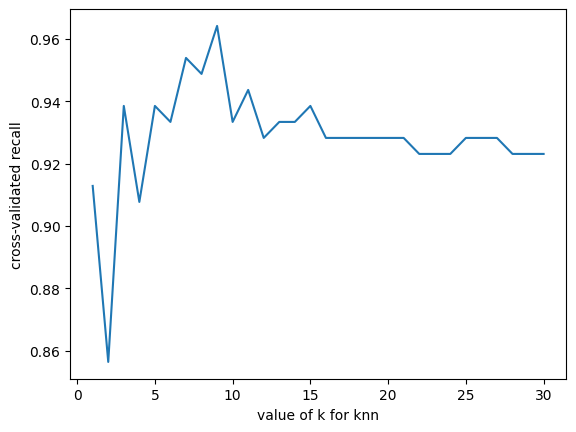

Best k value for recall:
[8]


In [25]:
# TRAINING DATA WITH KNN ALGORITHM (BEST RECALL)
kRange=range(1,31)
kScores=[]
for k in kRange:
    knn=KNeighborsClassifier(n_neighbors=k)
    #scores for KNN when scoring parameter is recall
    scores=cross_val_score(knn,X_train, y_train,cv=5,scoring='recall')
    kScores.append(scores.mean())  
# plotting the scores in the range
plt.plot(kRange,kScores)
plt.xlabel('value of k for knn')
plt.ylabel('cross-validated recall')
plt.show()
# Best k for recall
max_acc = max(kScores)
print("Best k value for recall:")
print([i for i, j in enumerate(kScores) if j == max_acc]) 

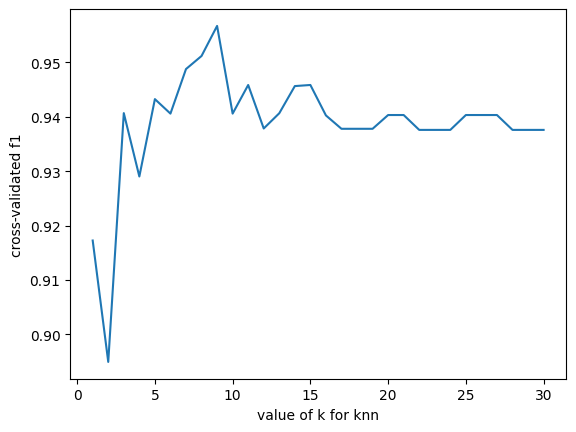

Best k value for f1:
[8]


In [26]:
# TRAINING DATA WITH KNN ALGORITHM (BEST F1-SCORE)
kRange=range(1,31)
kScores=[]
for k in kRange:
    knn=KNeighborsClassifier(n_neighbors=k)
    # scores for KNN when scoring parameter is f1
    scores=cross_val_score(knn,X_train, y_train,cv=5,scoring='f1')
    kScores.append(scores.mean())  
# plotting the scores in the range
plt.plot(kRange,kScores)
plt.xlabel('value of k for knn')
plt.ylabel('cross-validated f1')
plt.show()
# Best k for f1 score
max_acc = max(kScores)
print("Best k value for f1:")
print([i for i, j in enumerate(kScores) if j == max_acc]) 

KNN :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.98      0.96      0.97        46

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140

Precision : 97.856307
Recall : 97.857143
Accuracy : 97.857143
F1 Score : 97.851038


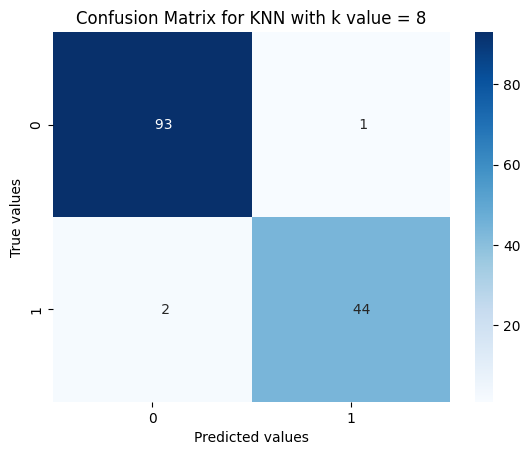

In [27]:
# setting k value = 8 as it one of the best k values
knn_best = KNeighborsClassifier(n_neighbors=8)
knn_best.fit(X_train,y_train)

y_pred = knn_best.predict(X_test)

print('KNN :')
print(classification_report(y_test, y_pred))

precision = precision_score(y_test, y_pred, average = 'weighted') * 100
recall = recall_score(y_test, y_pred, average = 'weighted') * 100
f1Score = f1_score(y_test, y_pred, average = 'weighted') * 100
accuracy= accuracy_score(y_test, y_pred) * 100

# printing obtained precision, recall, accuracy and f1 score
print('Precision : {:3f}'.format(precision))
print('Recall : {:3f}'.format(recall))
print('Accuracy : {:3f}'.format(accuracy))
print('F1 Score : {:3f}'.format(f1Score))

confMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confMatrix, cmap = 'Blues', annot = True, fmt = '7')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title("Confusion Matrix for KNN with k value = 8")
plt.show()

KNN :
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        94
           1       0.98      0.96      0.97        46

    accuracy                           0.98       140
   macro avg       0.98      0.97      0.98       140
weighted avg       0.98      0.98      0.98       140

Precision : 97.856307
Recall : 97.857143
Accuracy : 97.857143
F1 Score : 97.851038


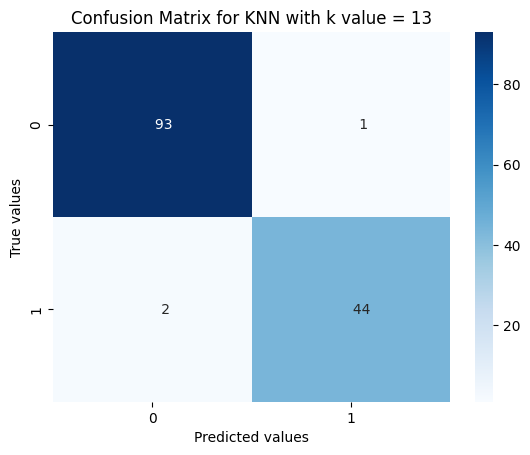

In [28]:
# setting k value = 13 as it one of the best obtained k values
knn_best = KNeighborsClassifier(n_neighbors=13)
knn_best.fit(X_train,y_train)

y_pred = knn_best.predict(X_test)

print('KNN :')
print(classification_report(y_test, y_pred))

precision_knn = precision_score(y_test, y_pred, average = 'weighted') * 100
recall_knn = recall_score(y_test, y_pred, average = 'weighted') * 100
f1Score_knn = f1_score(y_test, y_pred, average = 'weighted') * 100
accuracy_knn = accuracy_score(y_test, y_pred) * 100

# printing obtained precision, recall, accuracy and f1 score
print('Precision : {:3f}'.format(precision))
print('Recall : {:3f}'.format(recall))
print('Accuracy : {:3f}'.format(accuracy))
print('F1 Score : {:3f}'.format(f1Score))

confMatrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confMatrix, cmap = 'Blues', annot = True, fmt = '7')
plt.xlabel('Predicted values')
plt.ylabel('True values')
plt.title("Confusion Matrix for KNN with k value = 13")
plt.show()